###  Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

###  Load Dataset (House Prices Data)

In [3]:
# Creating a sample dataset: Features -> ['Size (sq ft)', 'Bedrooms', 'Age'] 
data = { 
    'Size': [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700], 
    'Bedrooms': [3, 3, 3, 4, 2, 3, 4, 4, 3, 3], 
    'Age': [20, 15, 18, 10, 25, 12, 8, 5, 20, 18], 
    'Price': [245000, 312000, 279000, 308000, 199000, 219000, 405000, 450000, 255000, 280000] 
       } 
df = pd.DataFrame(data)

# Splitting Features (X) and Target Variable (y) 
X = df[['Size', 'Bedrooms', 'Age']] 
y = df['Price'] 
 
# Splitting into Training and Testing Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Apply Multiple Regression Models

#### (A) Linear Regression

In [4]:
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train) 
y_pred_lr = lr_model.predict(X_test)

#### (B) Polynomial Regression 

In [5]:
poly = PolynomialFeatures(degree=2) 
X_poly_train = poly.fit_transform(X_train) 
X_poly_test = poly.transform(X_test) 
 
poly_model = LinearRegression() 
poly_model.fit(X_poly_train, y_train) 
y_pred_poly = poly_model.predict(X_poly_test) 

#### (C) Ridge & Lasso Regression

In [6]:
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train) 
y_pred_ridge = ridge_model.predict(X_test) 
 
lasso_model = Lasso(alpha=1.0) 
lasso_model.fit(X_train, y_train) 
y_pred_lasso = lasso_model.predict(X_test)

#### (D) Decision Tree Regression 

In [7]:
dt_model = DecisionTreeRegressor() 
dt_model.fit(X_train, y_train) 
y_pred_dt = dt_model.predict(X_test)

#### (E) Random Forest Regression

In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train) 
y_pred_rf = rf_model.predict(X_test)

###  Model Evaluation

In [9]:
models = { 
    "Linear Regression": y_pred_lr, 
    "Polynomial Regression": y_pred_poly, 
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso, 
    "Decision Tree Regression": y_pred_dt, 
    "Random Forest Regression": y_pred_rf 
} 
 
for name, pred in models.items(): 
    print(f"\n{name}:") 
    print("R² Score:", r2_score(y_test, pred)) 
    print("MSE:", mean_squared_error(y_test, pred)) 
    print("MAE:", mean_absolute_error(y_test, pred)) 


Linear Regression:
R² Score: -0.8677182171782849
MSE: 1517054121.9030619
MAE: 34855.72300416336

Polynomial Regression:
R² Score: -1.9598704113680991
MSE: 2404154741.6337385
MAE: 37208.87926576543

Ridge Regression:
R² Score: -0.862914222898878
MSE: 1513152077.5496137
MAE: 34716.82626439477

Lasso Regression:
R² Score: -0.8677321585585955
MSE: 1517065445.7892191
MAE: 34854.26610997642

Decision Tree Regression:
R² Score: -4.385657125269313
MSE: 4374500000.0
MAE: 51500.0

Random Forest Regression:
R² Score: -2.515327800588211
MSE: 2855325006.0277743
MAE: 44723.49999999997


###  Visualizing Model Performance

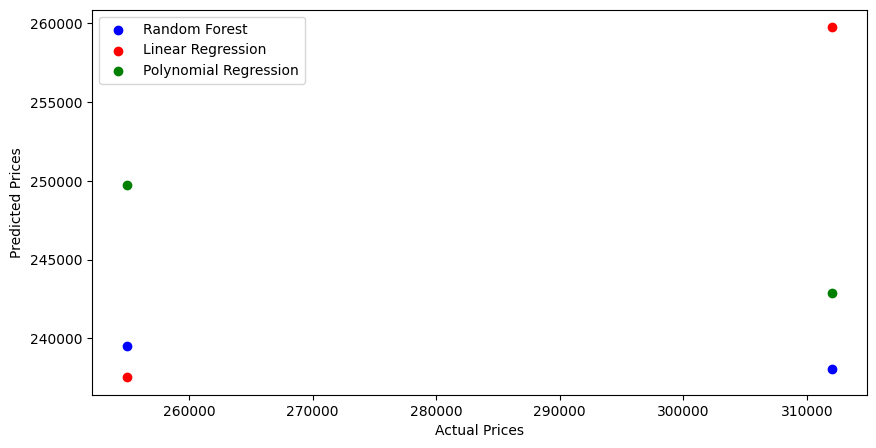

In [10]:
plt.figure(figsize=(10, 5)) 
plt.scatter(y_test, y_pred_rf, color='blue', label="Random Forest") 
plt.scatter(y_test, y_pred_lr, color='red', label="Linear Regression") 
plt.scatter(y_test, y_pred_poly, color='green', label="Polynomial Regression") 
plt.xlabel("Actual Prices") 
plt.ylabel("Predicted Prices") 
plt.legend() 
plt.show() 